<a href="https://colab.research.google.com/github/Found-Bugs/Pembelajaran-Mesin/blob/Kuis-2/Kuis2_ML_Kelompok5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anggota Kelompok :

**SEPTA PUMA SURYA			NIM. 2241720119** <br>
**DIKA DWI ALAMSYAH 			NIM. 2241720129** <br>
**ANDREAGAZY IZA AMERIANTO	NIM. 2241720146** <br>
**FARID FITRIANSAH ALFARIZI		NIM. 2241720055** <br>

# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install opencv-python-headless tensorflow keras_facenet scikit-learn matplotlib
!pip install keras-facenet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.2 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=0b9404324cb9880de858538c44c71ff0adc8fadcbd0a1606e5246529906bea5c
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [ ]:
# Import libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras_facenet import FaceNet
from tensorflow.keras.utils import to_categorical

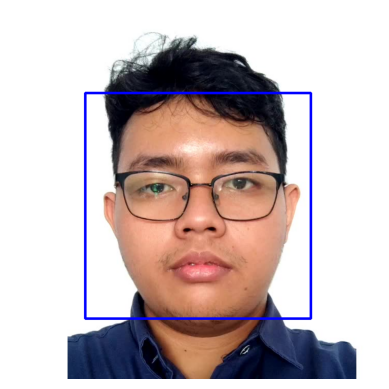

In [ ]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade pre-trained model for face detection
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

# Function for face detection
def detect_faces(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for detection

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)

    # Display the result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test with an example image (provide your own path here)
image_path = '/content/drive/MyDrive/Machine Learning Dataset/Andre/0002.jpg'  # Change to your dataset image
detect_faces(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Face found at [244, 247, 274, 357]
Embedding vector (first 5 values): [ 0.04450238 -0.01056097  0.0493768   0.04051411  0.02737102] ...


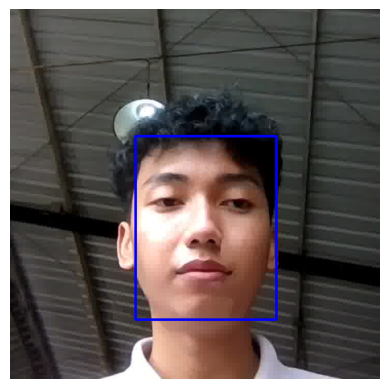

In [ ]:
# Initialize FaceNet model
embedder = FaceNet()

# Function to extract embeddings from detected faces
def extract_face_embeddings(image_path):
    # Read the image
    img = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces and get embeddings using FaceNet
    results = embedder.extract(rgb_img, threshold=0.95)

    # Print and display results
    for res in results:
        x, y, w, h = res['box']
        embedding = res['embedding']  # 512-dimensional embedding vector
        print(f"Face found at [{x}, {y}, {w}, {h}]")
        print(f"Embedding vector (first 5 values): {embedding[:5]} ...")

        # Draw bounding box around detected face
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)

    # Display the image with bounding box
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test with an example image (provide your own path here)
image_path = '/content/drive/MyDrive/Machine Learning Dataset/Dika/Dika (10).jpg'  # Change to your dataset image
extract_face_embeddings(image_path)

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Initialize FaceNet
embedder = FaceNet()

# Function to load images, extract embeddings, and labels
def load_dataset_and_embeddings(dataset_path):
    embeddings = []
    labels = []
    for person_name in os.listdir(dataset_path):
        person_folder = os.path.join(dataset_path, person_name)
        if os.path.isdir(person_folder):
            for image_name in os.listdir(person_folder):
                image_path = os.path.join(person_folder, image_name)
                img = cv2.imread(image_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Extract embeddings using FaceNet
                results = embedder.extract(img_rgb, threshold=0.95)
                if results:
                    embeddings.append(results[0]['embedding'])
                    labels.append(person_name)
    return np.array(embeddings), np.array(labels)

# Function to recognize a face and display the image with bounding box
def recognize_face(test_image_path, embeddings, labels, threshold=0.5):
    # Load and preprocess test image
    img = cv2.imread(test_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Extract embedding of the test image
    results = embedder.extract(img_rgb, threshold=0.95)
    if results:
        for res in results:
            x, y, w, h = res['box']
            test_embedding = res['embedding']

            # Compute cosine similarity with all known embeddings
            similarities = cosine_similarity([test_embedding], embeddings)
            best_match_idx = np.argmax(similarities)

            # Draw bounding box
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

            # Check if similarity exceeds threshold
            if similarities[0][best_match_idx] > threshold:
                recognized_label = labels[best_match_idx]
                text = f"{recognized_label} ({similarities[0][best_match_idx]:.2f})"
                print(f"Recognized as: {text}")

                # Put label text on the image
                cv2.putText(img, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("No match found or below threshold.")
                cv2.putText(img, "Unknown", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    else:
        print("No face detected in test image.")

    # Display the image with bounding box
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Load dataset and embeddings
dataset_path = '/content/drive/MyDrive/Machine Learning Dataset'
embeddings, labels = load_dataset_and_embeddings(dataset_path)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Recognized as: Andre (1.00)


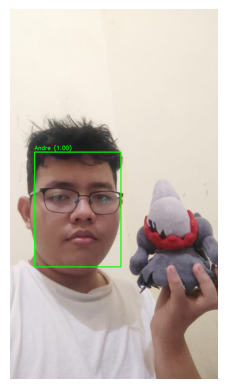

In [ ]:
# Test face recognition
image_path = '/content/drive/MyDrive/Machine Learning Dataset/Andre/TestDeteksi.jpg'  # Path to your test image
recognize_face(image_path, embeddings, le.inverse_transform(labels_encoded))